In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
#import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, plot_roc_curve, accuracy_score

pd.set_option('display.max_columns', None) 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone

plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import matplotlib.pyplot as plt

from utils import XyScaler
from roc_curve2 import roc_curve

In [3]:
checker = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv')
checker_base=checker.copy() 

In [4]:
df_withID = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/ready12_24_train.csv')

In [5]:
df_hot = pd.read_csv('/home/allen/Galva/capstones/capstone2/src/explore/hot_code_NO_scale.csv')
df_hot.info()
df_hot=df_hot.drop(['Category1_x','Category2','Category3','Job_Type', 'online_score', 'City_Type','Health_Camp_ID'],axis=1)
df_hot.info()
df_hot['Camp Start Date - Registration Date'] = df_hot['Camp Start Date - Registration Date'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75278 entries, 0 to 75277
Data columns (total 54 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Health_Camp_ID                         75278 non-null  int64  
 1   Var1                                   75278 non-null  float64
 2   Var2                                   75278 non-null  float64
 3   Var3                                   75278 non-null  float64
 4   Var4                                   75278 non-null  float64
 5   Var5                                   75278 non-null  float64
 6   Category1_x                            75278 non-null  object 
 7   Category2                              75278 non-null  object 
 8   Category3                              75278 non-null  int64  
 9   City_Type                              75278 non-null  int64  
 10  Job_Type                               75278 non-null  float64
 11  on

In [6]:
d= ['delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '23384', 'B', 'C',
       'D', 'E', 'F', 'G', '2100', '2.0', '5.0', '8.0', '9.0', '10.0',
       '9999.0', '1', '2', '3', '4']
plain = checker.drop(d,axis=1)

In [7]:
plain.to_csv('plain_df_to_test.csv', index=False)

In [8]:
plt.rcParams['figure.dpi'] = 200

In [9]:
from numpy import argmax 

In [10]:
import seaborn as sns
'''
 6   delta_first_reg               75278 non-null  float64
 7   interaction_regreister_delta  75278 non-null  float64
 8   delta_first_start             75278 non-null  float64
 9   delta_reg_end                 75278 non-null  float64

'''

'\n 6   delta_first_reg               75278 non-null  float64\n 7   interaction_regreister_delta  75278 non-null  float64\n 8   delta_first_start             75278 non-null  float64\n 9   delta_reg_end                 75278 non-null  float64\n\n'

<AxesSubplot:>

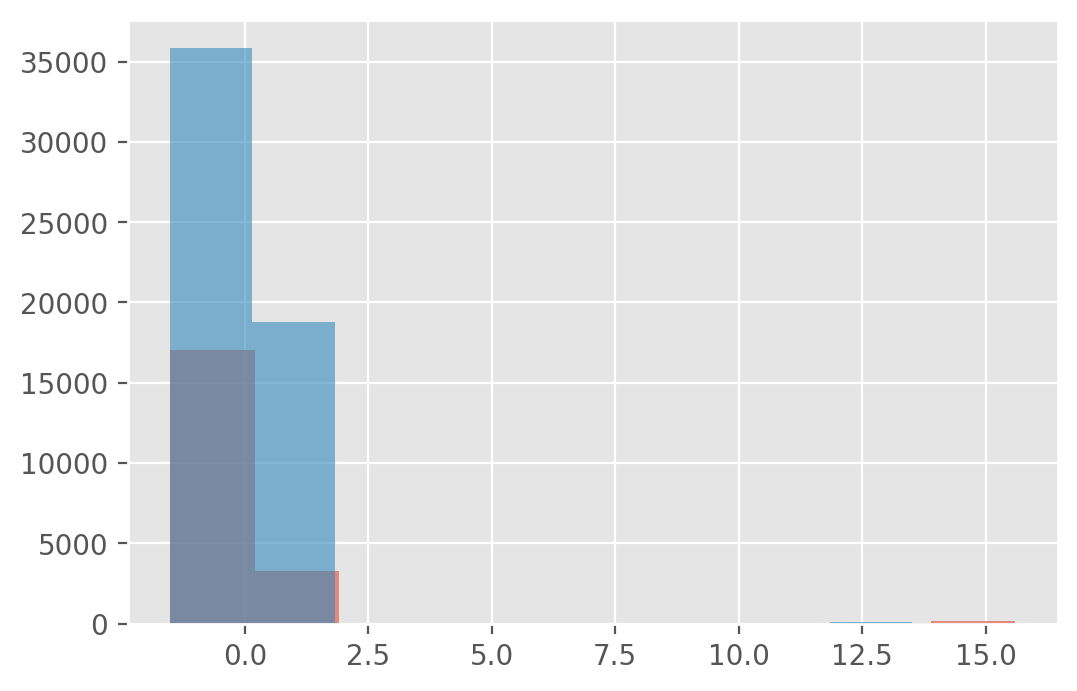

In [11]:
# make hist 
checker[checker['y_target'] ==1]['delta_first_reg'].hist(alpha=.6)
checker[checker['y_target'] ==0]['delta_first_reg'].hist(alpha=.6)


In [12]:
checker2 = checker.copy() 

In [13]:
some_check = checker.dropna(axis=1)
#print(some_check.info())

In [14]:
l1_ratio = 0.4

In [15]:
checker_base.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5', 'y_target', 'delta_first_reg',
       'interaction_regreister_delta', 'delta_first_start', 'delta_reg_end',
       'Camp_Length', 'Second', 'Third', '1036', '1216', '1217', '1352',
       '1704', '1729', '2517', '2662', '23384', 'B', 'C', 'D', 'E', 'F', 'G',
       '2100', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0', '10.0',
       '11.0', '12.0', '13.0', '14.0', '9999.0', '1', '2', '3', '4'],
      dtype='object')

In [16]:
cb1 = checker_base.copy() 
cb2 = checker_base.copy()
cb3 = checker_base.copy() 
cb4 = checker_base.copy() 
cb5 = checker_base.copy()  
cb7 = checker_base.copy()  
cb9 = checker_base.copy()  
cb10 = checker_base.copy()  
cb11 = checker_base.copy()  
cb12 = checker_base.copy()  
cb20 = checker_base.copy()  

In [17]:
checkerxx = plain.copy()

In [18]:
checker = checker.copy()
checker = checker.drop(['Var4','11.0', '12.0', '13.0', '14.0','1217', '1352',
       '1704', '1729', '2517', '2662','7.0','4.0','6.0','3.0'],axis=1)
checker1 = checker.copy() 

checker3 = checker.copy() 
checker4 = checker.copy() 
checker5 = checker.copy() 
checker7 = checker.copy()  

In [19]:
y_to_test = checkerxx['y_target']


In [20]:
ynotx = y_to_test 
train_test_split(ynotx, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checkerxx,ynotx,test_size = .5, random_state=101)


from sklearn.linear_model import LogisticRegression
logmodelx = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=1, l1_ratio=None ) 
logmodelx.fit(X_train, y_train)

LogisticRegression(n_jobs=1)

In [21]:
probax = logmodelx.predict_proba(X_test)[:,1]
predx = logmodelx.predict(X_test)

In [22]:
g = [ X_train, X_test, y_train,y_test,predx,probax]
for i in g:
    print(len(i))
Xs = X_train - X_test 

37639
37639
37639
37639
37639
37639


In [23]:
'''
A. Take X_train - X_test that creates == TO_check <56458-18820> = 37639
B. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check

def get_specifics(X_train, y_train,predx ):



'''

'\nA. Take X_train - X_test that creates == TO_check <56458-18820> = 37639\nB. Add the column from [logmodelx.predict_proba(X_test)[:,1]] to Take TO_check\n\ndef get_specifics(X_train, y_train,predx ):\n\n\n\n'

In [24]:
predsx, preds2x = predx >= .5 ,predx >= .7
# for name, coef in zip(predsx[1:], logmodelx.coef_[0]):
#     print("{0}: {1:0.4f}".format(name, coef))

In [25]:
print(len(predsx), len(X_train), len(X_test))
X_train_len = len(X_train)
X_test_len = len(X_test)
print(X_train_len - X_test_len)

37639 37639 37639
0


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2x) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [27]:
print(confusion_matrix(y_test,preds2x)) 

[[27343     0]
 [    0 10296]]


In [28]:
print(classification_report(y_test,predsx) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [29]:
to_try = confusion_matrix(y_test,predsx)
print(to_try) 

[[27343     0]
 [    0 10296]]


In [30]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

In [59]:
# features = ['Var5'] 

# display = plot_partial_dependence(logmodelx, X_train, features)

# display.figure_.suptitle( 'Partial dependence ' )
# display.figure_.subplots_adjust(hspace=0.3)

In [32]:
#ynot1 = checker1.pop('y_target')
ynot1 = cb1.pop('y_target')

train_test_split(ynot1, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    checker1,ynot1,test_size = .5, random_state=101)

In [33]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
        fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
        solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
        n_jobs=-1, l1_ratio=None ) 
logmodel.fit(X_train, y_train)

LogisticRegression(n_jobs=-1)

In [34]:
pure_probaz = logmodel.predict_proba(X_test)[:,1]
predictionsz = logmodel.predict(X_test) 

In [35]:
roc_auc_logmodel = roc_auc_score(y_test, logmodel.fit(X_train, y_train).predict_proba(X_test)[:, -1]) 
print(roc_auc_logmodel)

1.0


In [36]:
# logmodel_disp = plot_roc_curve(logmodel, X_test, y_test)
# plt.show()

In [37]:
predsz, preds2z = predictionsz >= .4 ,predictionsz >= .5
for name, coef in zip(preds2z[1:], logmodel.coef_[0]):
    print("{0}: {1:0.4f}".format(name, coef))

False: 0.0086
False: -0.0213
False: -0.0050
False: 0.0728
False: 13.8320
False: -0.0037
False: 0.0146
False: 0.0150
False: 0.0780
True: 0.0962
True: 0.4925
False: 0.4112
False: -0.0051
False: 0.0279
True: -0.1876
False: -0.1778
True: 0.1762
True: 0.1827
True: -0.4102
False: -0.4912
False: 0.4112
True: -0.0808
True: 0.0151
True: 0.0162
False: -0.0112
False: -0.0168
False: 0.0136
False: -0.1249
False: 0.0885
False: 0.1150
False: 0.0512
False: 0.0264


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds2z) ) 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [39]:
print(classification_report(y_test,predsz) )

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27343
         1.0       1.00      1.00      1.00     10296

    accuracy                           1.00     37639
   macro avg       1.00      1.00      1.00     37639
weighted avg       1.00      1.00      1.00     37639



In [40]:
print(confusion_matrix(y_test,predsz))  

[[27343     0]
 [    0 10296]]


In [41]:
print(confusion_matrix(y_test,preds2z)) 

[[27343     0]
 [    0 10296]]


In [42]:
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

In [43]:
ynot3 = checker3.pop('y_target')
cb3y = cb3.pop('y_target')

train_test_split(cb3, shuffle=False) 
X_train,X_test,y_train,y_test = train_test_split(
    cb3,cb3y,test_size = .5, random_state=42)



X = checker3
X_const = add_constant(X, prepend=True)
y3 = ynot3 
logit_model = Logit(y3, X_const).fit()
# PerfectSeparationError: Perfect separation detected, results not available#
# Is the above from not train_test split ?! 

Optimization terminated successfully.
         Current function value: 0.454224
         Iterations 7


In [44]:
# logit_model.summary()

In [45]:
y1 = cb20.pop('y_target') 

In [46]:
# kfold = KFold(n_splits=5)

# accuracies = []
# precisions = []
# recalls = []

# X_train, X_test, y_train, y_test = train_test_split(cb20, y1)

# for train_index, test_index in kfold.split(X_train):
#     model = LogisticRegression(penalty='l2', dual=False, tol=1e-4, C=1.0, 
#         fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, 
#         solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
#         n_jobs=1, l1_ratio=None )
#     model.fit(X_train.iloc[train_index], y1.iloc[train_index])
#     y_predict = model.predict(X_train.iloc[test_index])
#     y_true = y1.iloc[test_index]
#     accuracies.append(accuracy_score(y_true, y_predict))
#     precisions.append(precision_score(y_true, y_predict))
#     recalls.append(recall_score(y_true, y_predict))

# print("Accuracy:", np.average(accuracies))
# print("Precision:", np.average(precisions))
# print("Recall:", np.average(recalls))

In [47]:
#ynot1 = checker1.pop('y_target')
ynot1 = cb12.pop('y_target')
one_hot7 = df_hot.copy()

In [48]:
from sklearn.ensemble import RandomForestClassifier
y7 = one_hot7.pop('y_target')
X7 = one_hot7

# y = checker7.pop('y_target')
# X = checker7

# y = cb7.pop('y_target')
# X = cb7

X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y7, random_state=42)

rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
rfc.fit(X_train7,y_train7)
rfc_preds = rfc.predict(X_test7)
roc_auc=roc_auc_score(y_test7, rfc.predict_proba(X_test7)[:, -1])



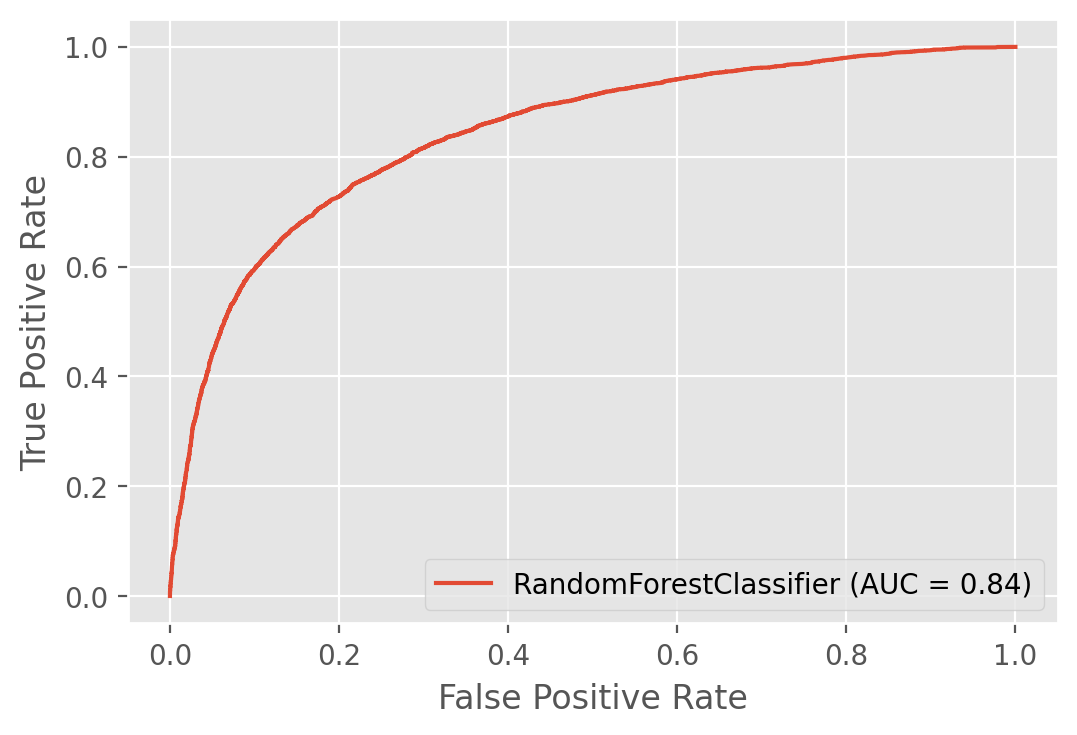

In [49]:
 
rf_no_scale_disp = plot_roc_curve(rfc, X_test7, y_test7)
plt.show()

In [50]:
one_hot7.columns

Index(['Var1', 'Var2', 'Var3', 'Var4', 'Var5',
       'Camp Start Date - Registration Date',
       'Registration Date - First Interaction',
       'Camp Start Date - First Interaction',
       'Camp End Date - Registration Date', 'Camp Length', 'Second', 'Third',
       'A', 'C', 'D', 'E', 'F', 'G', '2100', '2.0', '3.0', '4.0', '5.0', '6.0',
       '7.0', '8.0', '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '9999.0',
       '1', '2', '3', '4', '1036', '1216', '1217', '1352', '1704', '1729',
       '2517', '2662', '23384'],
      dtype='object')

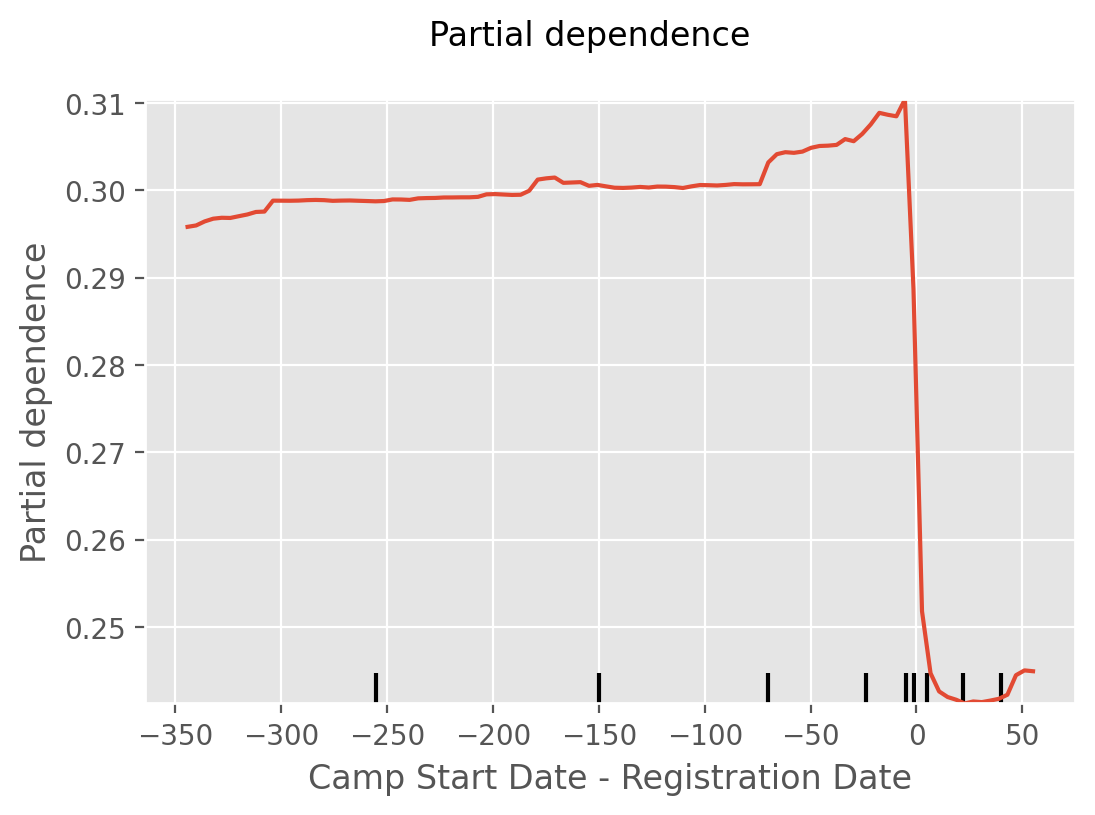

In [51]:
features = ['Camp Start Date - Registration Date'] 

display = plot_partial_dependence(rfc, X_train7, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

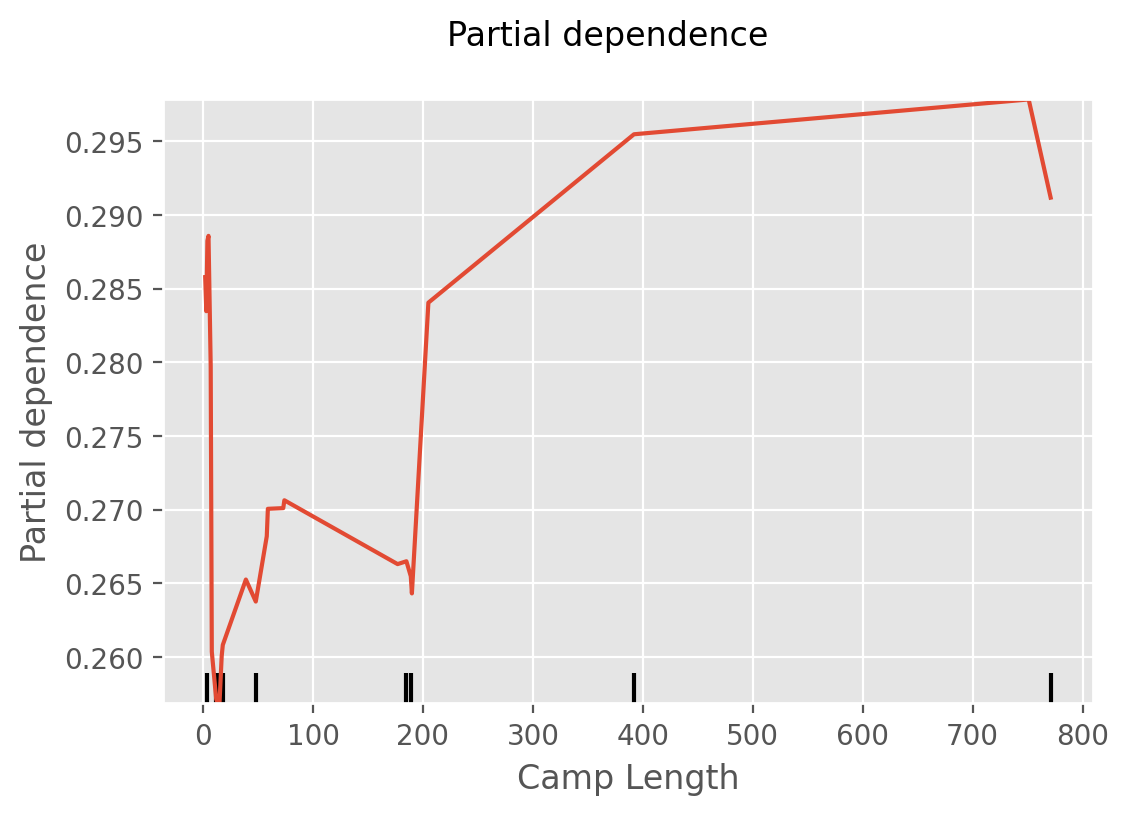

In [52]:
features = ['Camp Length'] 

display = plot_partial_dependence(rfc, X_train7, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

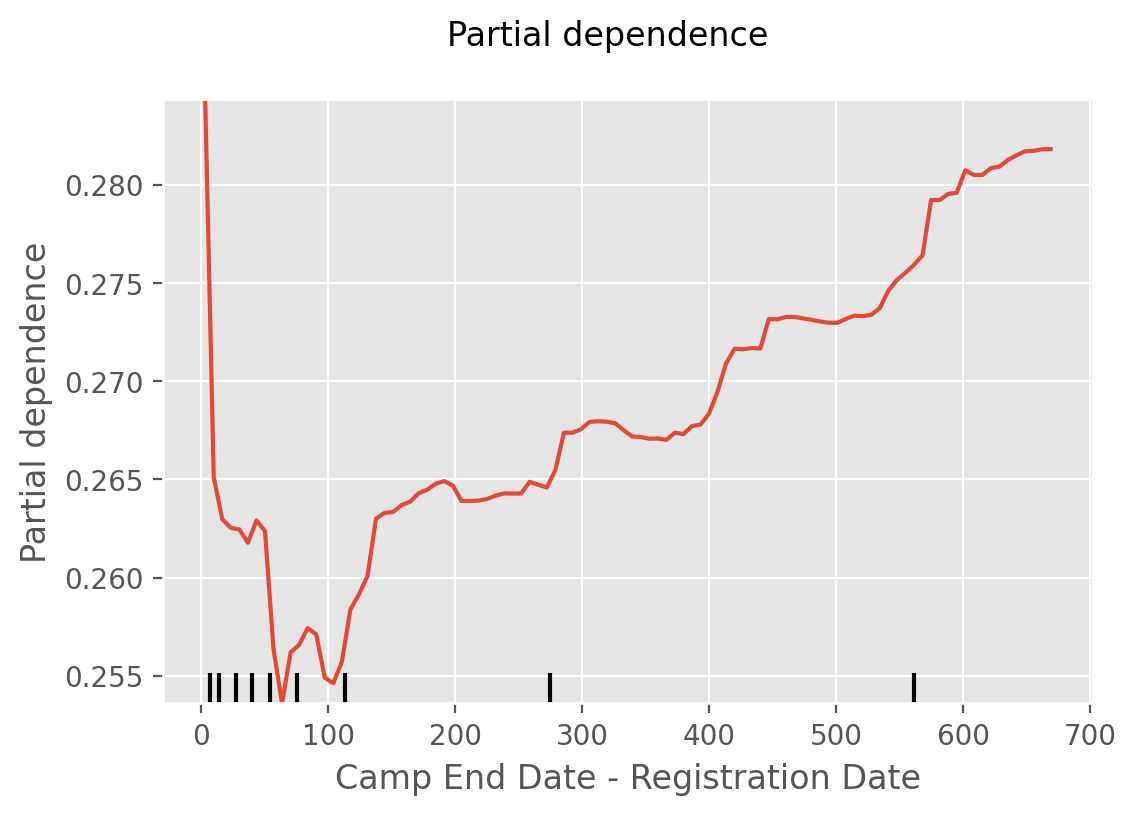

In [57]:
features = ['Camp End Date - Registration Date'] 

display = plot_partial_dependence(rfc, X_train7, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

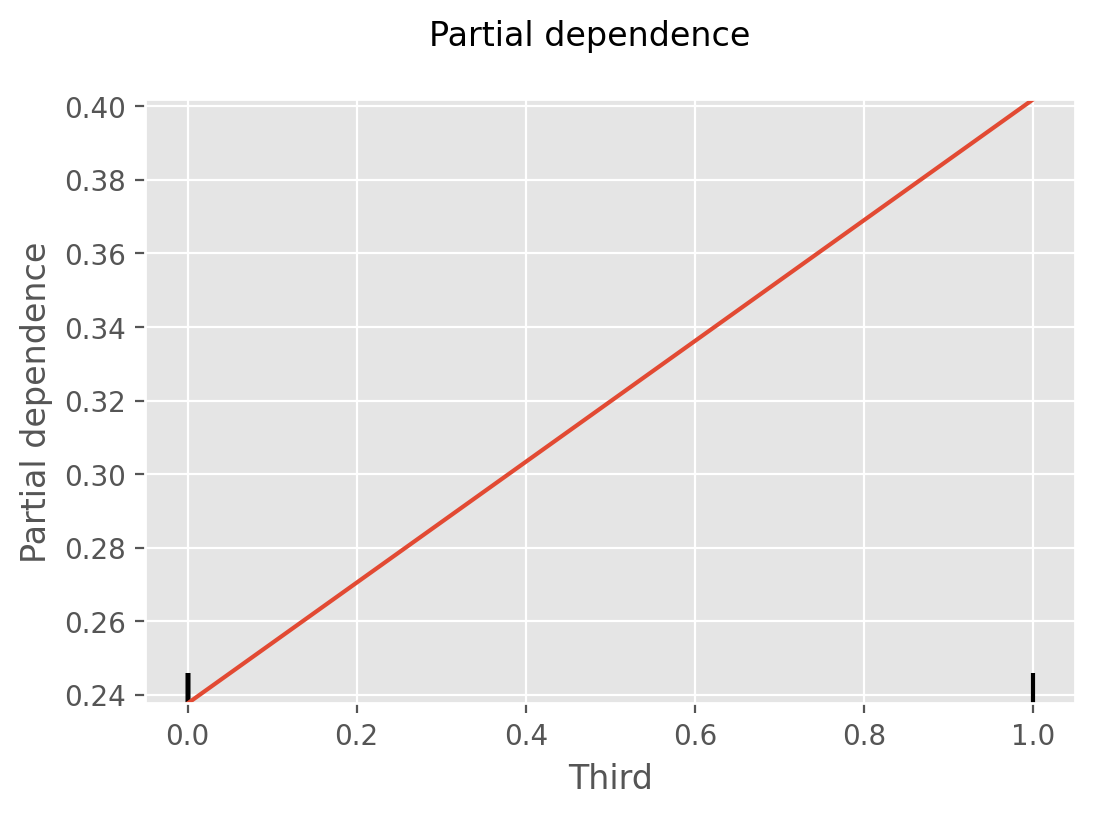

In [58]:
features = ['Third'] 

display = plot_partial_dependence(rfc, X_train7, features)

display.figure_.suptitle( 'Partial dependence ' )
display.figure_.subplots_adjust(hspace=0.3)

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import plot_roc_curve

# y = checker.pop('y_target')
# X = checker

y = cb4.pop('y_target')
X = cb4

X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, random_state=42)

svc = SVC(random_state=42, probability = True)
svc.fit(X_test4, y_test4)

# rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10)
# rfc.fit(X_train,y_train)
# rfc_preds = rfc.predict(X_test)


# print(classification_report(y_test,rfc_preds) ) 
# print(confusion_matrix(y_test,rfc_preds)) 

svc_disp = plot_roc_curve(svc, X_test4, y_test4)
plt.show()
svc_preds4 = svc.predict(X_test4)
svc_proba4 = svc.predict_proba(X_test4)[:,1]

pred4 , preds4 = svc_proba4  >= .5 , svc_proba4  >= .4

print(classification_report(y_test4,svc_preds4) )
print(confusion_matrix(y_test4,svc_preds4)) 

print(confusion_matrix(y_test4,svc_proba4)) 

svc_disp = plot_roc_curve(svc, X_test4, y_test4)
plt.show()

KeyboardInterrupt: 

In [ ]:
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
y_trained_sum_of1 = [1 for x in y_train.values if x==1]
print(sum(y_trained_sum_of1), len(y_train.values))
y_test_sum_of1 = [1 for x in y_test.values if x==1]
print(sum(y_test_sum_of1),'y_test', len(y_test.values))

In [ ]:
# try and recombine data frame to examine outputs. 

In [54]:
def cm_to_inch(value):
    return value/2.54

<Figure size 1181.1x787.402 with 0 Axes>

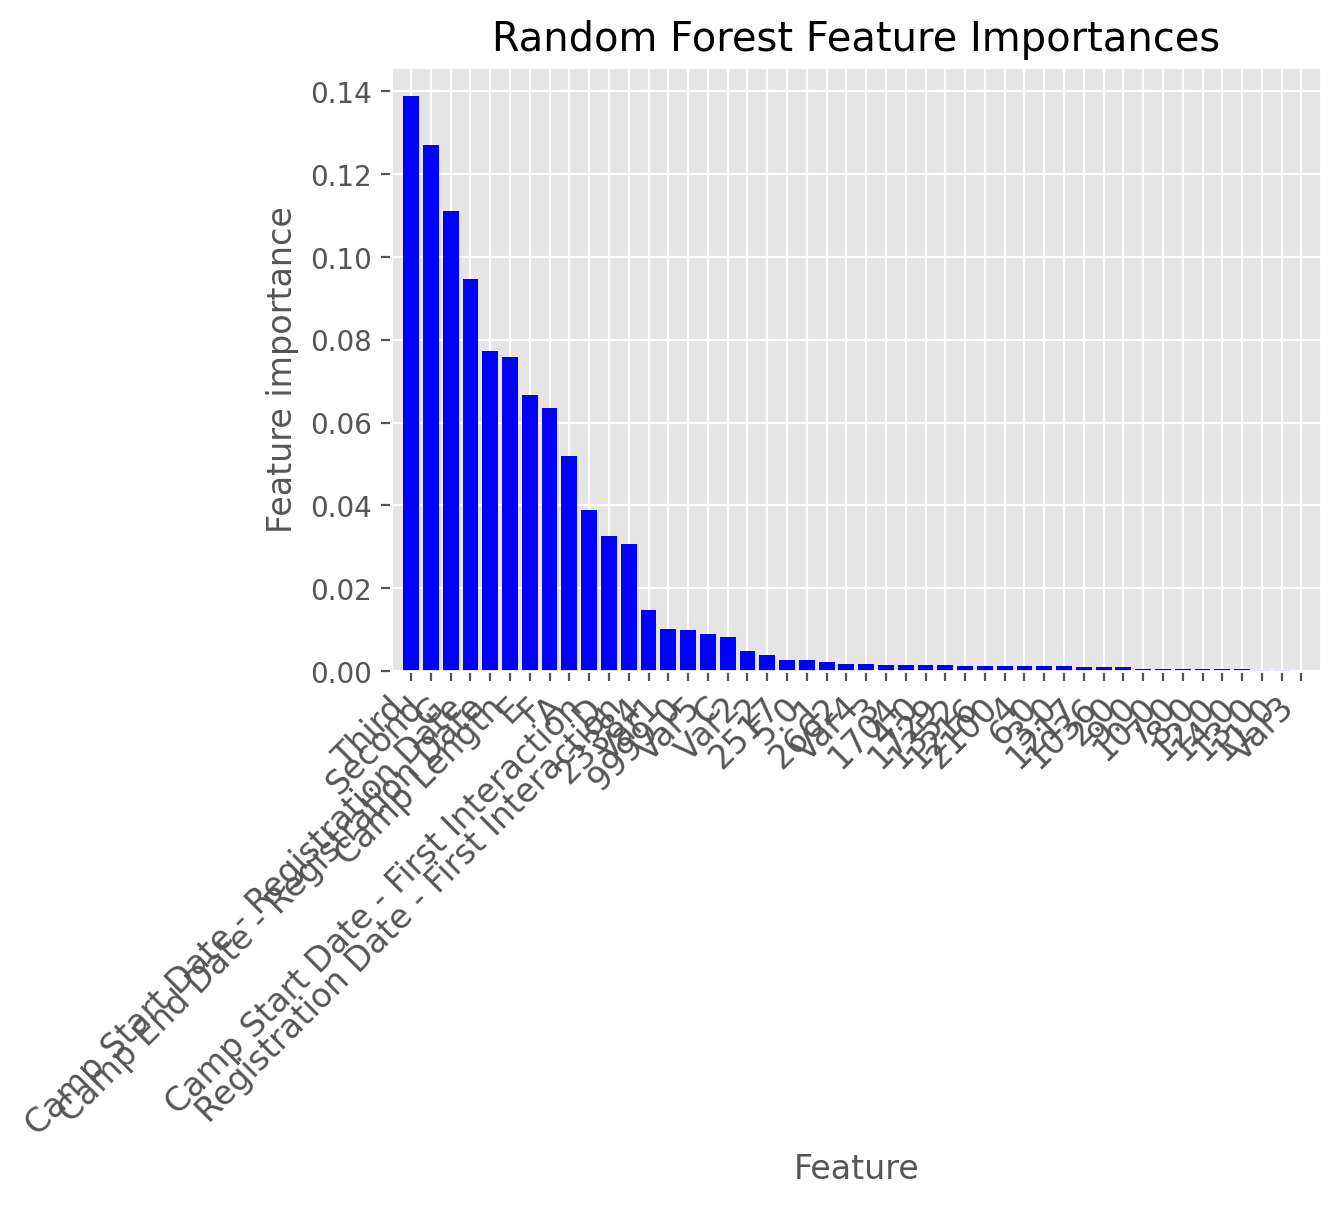

<Figure size 1181.1x787.402 with 0 Axes>

In [55]:
col_names = X_test7.columns 
importances = rfc.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'Random Forest'
plt.bar(range(X_test7.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test7.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [80]:
one_hotx = df_hot.copy()
one_hotx.to_csv('hot_and_ready_to_test.csv',index=False)

In [60]:
one_hot9 = df_hot.copy()
one_hot4 = df_hot.copy()

In [ ]:
# y = cb9.pop('y_target')
# x = cb9

In [61]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error

In [62]:
y9=one_hot9.pop('y_target')
x9=one_hot9

In [63]:
X_train9, X_test9, y_train9, y_test9 = train_test_split(x9, y9, test_size=0.2, random_state=101) 

In [64]:
train_dmatrix = xgb.DMatrix(data=X_train9,label=y_train9) 
test_dmatrix = xgb.DMatrix(data=X_test9,label=y_test9)

In [65]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=train_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [66]:
#evallist = [(test_dmatrix, 'eval'), (train_dmatrix, 'train')] ,evallist,early_stopping_rounds=50
xgb_one = xgb.train(params,train_dmatrix )
# AssertionError: Must have at least 1 validation dataset for early stopping. 

In [67]:
ypred = xgb_one.predict(test_dmatrix, ntree_limit =xgb_one.best_ntree_limit )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

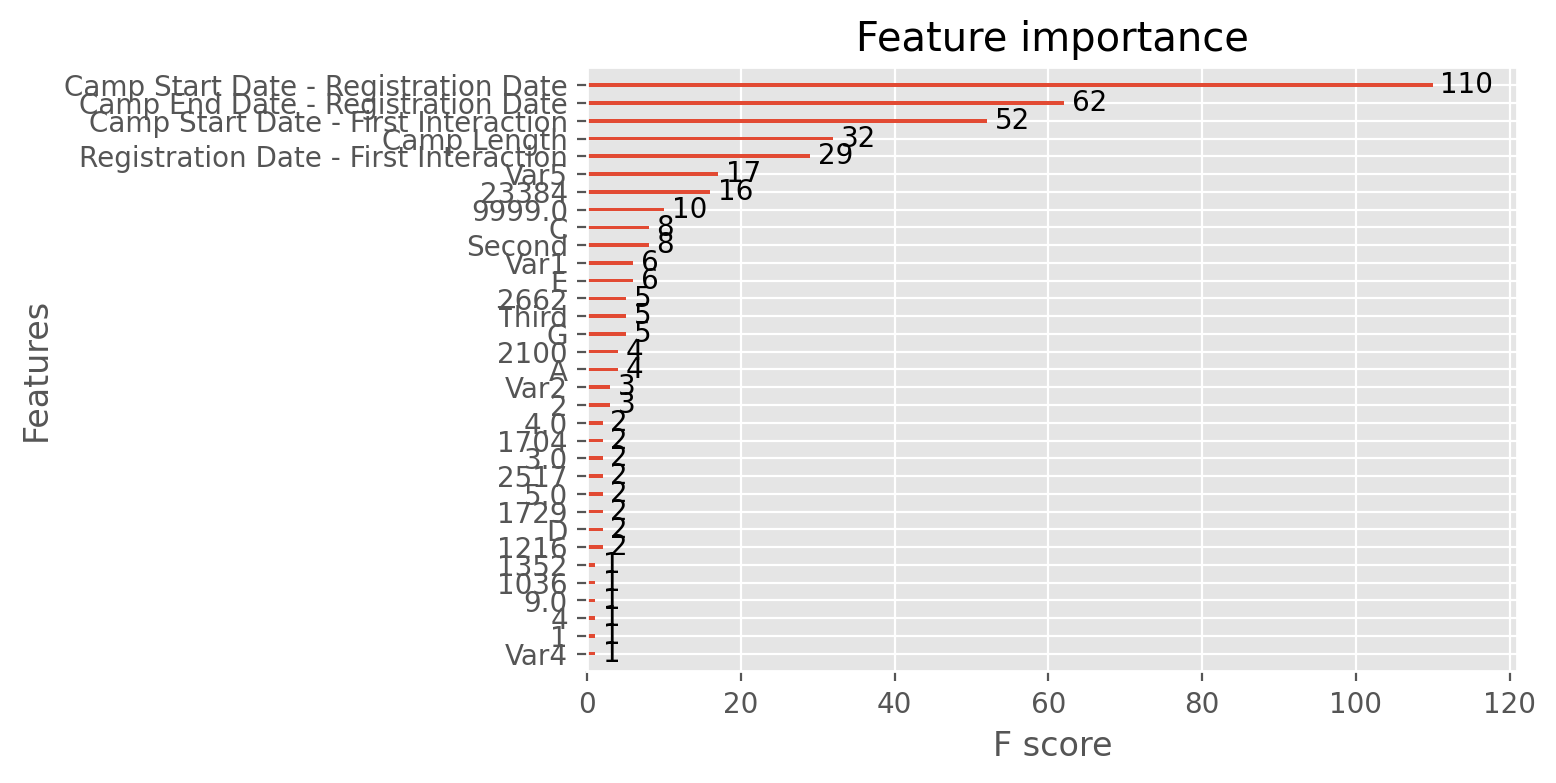

In [68]:
xgb.plot_importance(xgb_one, grid='off')

In [69]:
print(ypred)


[0.2479443  0.23849621 0.28081793 ... 0.37670895 0.3623538  0.6627982 ]


In [70]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc', label_encoder=False)
xg_reg1.fit(X_train9,y_train9) 

[19:32:49] WARNING: ../src/learner.cc:541: 
Parameters: { label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




/home/allen/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(alpha=8, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', label_encoder=False,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=12, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=8, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

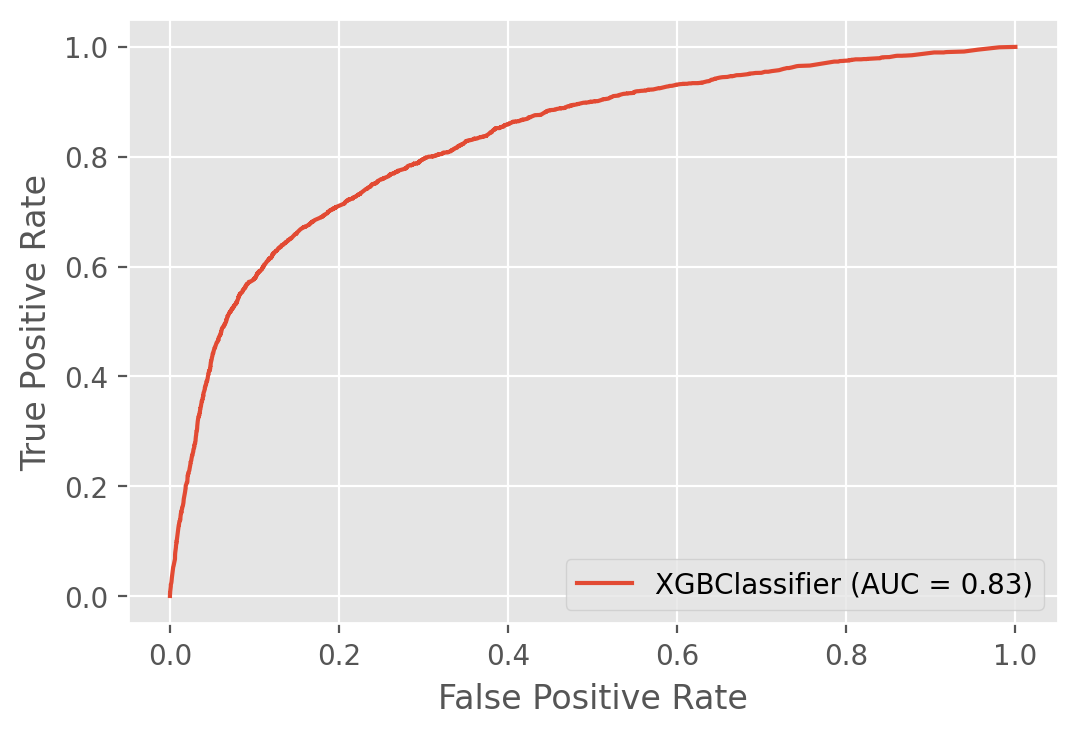

In [77]:
xg_reg1_predict = xg_reg1.predict(X_test9) 
xg_reg1_proba = xg_reg1.predict_proba(X_test9)[:,1]

predsx, preds2x = predx >= .5 ,predx >= .7
preds_xg1_thresh1, preds2_xg1_thresh2 = xg_reg1_proba >=0.65 , xg_reg1_proba >=0.4

xg_reg1_disp = plot_roc_curve(xg_reg1 , X_test9, y_test9)
plt.show()




In [ ]:
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
ax.set_title('ROC Curve')
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
xg_reg1_disp2 = plot_roc_curve(xg_reg1, X_test9, y_test9, ax=ax, alpha=0.8) 
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)

 
plt.show()

In [78]:
print(classification_report(y_test9,preds_xg1_thresh1 ) )
print(classification_report(y_test9,preds2_xg1_thresh2 ) )

              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85     10904
         1.0       0.82      0.15      0.25      4152

    accuracy                           0.76     15056
   macro avg       0.78      0.57      0.55     15056
weighted avg       0.77      0.76      0.69     15056

              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87     10904
         1.0       0.68      0.60      0.63      4152

    accuracy                           0.81     15056
   macro avg       0.76      0.74      0.75     15056
weighted avg       0.80      0.81      0.81     15056



In [79]:
print(confusion_matrix(y_test9,preds_xg1_thresh1))  
print(confusion_matrix(y_test9,preds2_xg1_thresh2))  

[[10764   140]
 [ 3531   621]]
[[9708 1196]
 [1668 2484]]


In [ ]:
[[6166 1409]
 [ 872 2092]]

[[6956  619]
 [1372 1592]]


In [ ]:
pint45 = 1409+2092
pint35 = 619+1592 
print(pint45,pint35)

In [ ]:

for i in ok:
    for ii in i :
        print(f'this is a thing from i -> {ii} being printed')
        
        

In [ ]:
# [14350,  2314]
# [ 2711,  3209] Log no date

# [[13589    71]
#  [ 5122    38]]


labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [2314, 2711] # bottom part of column
tops = [ 3209 ,14350 ] # Top part of column

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, bottoms, width, label='Incorrectly predicted')
ax.bar(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')
ax.set_ylabel('Counts')
ax.set_title('Initial Results - Random Forest')
ax.legend()
plt.show()


In [ ]:
#best model_standard= ([16646,    18],[ 5911,9] ) 

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

rf = 2269,1545,
3651,6633 #1545/3651 RF_no_Holdout

 #15119,  1545]
#[ 2269,  3651]] # FRF_hold_out

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [1545,2269] # bottom part of column
tops = [ 3651 ,15119 ] # Top part of column


width = 0.35       # the width of the bars: can also be len(x) sequence
fig, (ax,ax2) = plt.subplots(1,2)
ax.bar(labels, bottoms, width, label='Incorrectly predicted')
ax.bar(labels, tops, width, bottom=bottoms,
       label='Correctly predicted')
ax.set_ylabel('Counts')
ax.set_ylim([0,17500])

ax.legend()

fig.suptitle('Analysis of Model Test Results ')

bottoms2 = [2314, 2711] # bottom part of column
tops2 = [ 3209 ,14350 ] # Top part of column
width = 0.35     
ax2.bar(labels, bottoms2, width, label='Incorrectly predicted')
ax2.bar(labels, tops2, width, bottom=bottoms2,
       label='Correctly predicted')
ax2.set_ylim([0,17500])
plt.show()
for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
'''
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Did Attend', 'Did NOT Attend'] # model Names
bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] # Top part of column

'''


boost = 1510,2334 ,3586,15154

In [ ]:
ok=[[6633,  942],
 [1326, 1638]]

labels = ['Were Goin', 'Were NOT Going'] # model Names
bottoms = [1326,942] # bottom part of column
tops = [ 6633,1638 ] # Top part of column

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()


ax.bar(labels, bottoms,width,label='Incorrectly predicted')
ax.bar(labels, tops, width, label='Correctly predicted',bottom=tops,)

ax.set_ylabel('Counts')
ax.set_title('Analysis of Model Test Results ')
ax.legend()

plt.show()

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt

jobs = ['Did Attend','Did NOT Attend']

# input wait times
waittimesin = ['03:20:50','04:45:10']
# converting wait times to float
waittimes = []
for wt in waittimesin:
    waittime = datetime.strptime(wt,'%H:%M:%S')
    waittime = waittime.hour + waittime.minute/60 + waittime.second/3600
    waittimes.append(waittime)

# input run times
runtimesin = ['00:20:50','01:00:10']
# converting run times to float    
runtimes = []
for rt in runtimesin:
    runtime = datetime.strptime(rt,'%H:%M:%S')
    runtime = runtime.hour + runtime.minute/60 + runtime.second/3600
    runtimes.append(runtime)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(jobs, waittimes, align='center', height=.25, color='b',label='Correctly Predicted')
ax.barh(jobs, runtimes, align='center', height=.25, left=waittimes, color='r',label='Incorrectly Predicted')
ax.set_yticks(jobs)
ax.set_xlabel('Counts')
ax.set_title('Feature Importances')
ax.grid(True)
ax.legend()

#plt.savefig('C:\\Data\\stackedbar.png')
plt.show()

bottoms = [942,1326] # bottom part of column
tops = [ 1638 ,6633 ] 

In [ ]:
4800*14.7

In [ ]:
188543/353064

In [ ]:
y = checker4.pop('y_target')
x = checker4
X_train4, X_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2, random_state=101) 

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
xg_reg1 = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 6, alpha = 8, n_estimators = 12, eval_metric = 'auc')

In [ ]:
xg_reg1.fit(X_train4,y_train4)

In [ ]:
tree1_predict = xg_reg1.predict(X_test4) 
tree1_proba = xg_reg1.predict_proba(X_test4)

In [ ]:
predsx, preds2x = tree1_proba >= .5 ,tree1_proba >= .4
print(classification_report(y_test4,tree1_predict ) )
print(confusion_matrix(y_test4,tree1_predict)) 

In [ ]:

col_names = X_test4.columns 
importances = xg_reg1.feature_importances_
indices = np.argsort(importances)[::-1]
title = 'XG Boost Classifier'
plt.bar(range(X_test4.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(title))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test4.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test4.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))


In [ ]:
xg_reg1_disp = plot_roc_curve(xg_reg1, X_test4, y_test4)
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = plot_roc_curve(rfc, X_test, y_test, ax=ax, alpha=0.8)
svc_disp.plot(ax=ax, alpha=0.8)
logmodel_disp.plot(ax=ax, alpha=0.8)
plt.show()

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)

In [ ]:
xgb_clf = xgb.XGBClassifier()
xgb_clf = xgb_clf.fit(X_train, y_train)

In [ ]:
uh = xgb_clf.predict(X_test) 
pred_proba = xgb_clf.predict_proba(X_test)

In [ ]:
probs = pred_proba[:,1] 

In [ ]:
col_names = X_test.columns 
importances = xgb_clf.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xgb_clf'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(25),cm_to_inch(20)))

In [ ]:
# plotdf = pd.DataFrame({"P1":uh ,"P2":probs})
# # ax = plotdf.plot.bar(color=["SkyBlue", "IndianRed"], rot=0, title= "COmpare Results")
# # plt.show()

# df = plotdf.copy()
# df.info()

In [ ]:
df1=df.copy()
for i in to_transfer:
    df1[i] = X_test[i]
print(df1.info())

In [ ]:
 # https://stackoverflow.com/questions/57730192/how-to-save-gridsearchcv-xgboost-model

In [ ]:
xg_reg = XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 8, n_estimators = 10, eval_metric = 'auc')

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [ ]:
print(xg_reg.predict_proba(X_test)) 

In [ ]:
preds

In [ ]:
params = {"objective":'binary:logistic','colsample_bytree': 0.6,'learning_rate': 0.1,
       "min_child_weight": 5 ,'max_depth': 6, 'alpha': 10, 'eval_metric':'auc', 'subsample':0.8} 

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=100, metrics='auc', as_pandas=True, seed=123)


In [ ]:
cv_results[45:]

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200 
# xgb.plot_tree(xg_reg,num_trees=0) # plt.rcParams['figure.figsize'] = [50, 10] # plt.show()

In [ ]:
xgb.plot_importance(xg_reg )
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [ ]:
print(checker3.shape)

In [ ]:
col_names = X_test.columns 
importances = xg_reg.feature_importances_
indices = np.argsort(importances)[::-1]
Random_Forest = 'XG Boost Classifier for xg_reg'
plt.bar(range(X_test.shape[1]), importances[indices], color="b")
plt.title("{} Feature Importances".format(Random_Forest))
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.xticks(range(X_test.shape[1]), col_names[indices], rotation=45, fontsize=12, ha='right')
plt.xlim([-1, X_test.shape[1]])
plt.figure(figsize=(cm_to_inch(15),cm_to_inch(10)))

In [ ]:
dataset = np.genfromtxt('/home/allen/Galva/capstones/capstone2/src/explore/train_4_model.csv',delimiter=',' ,skip_header=True)

In [ ]:
print(dataset.shape)

In [ ]:
selector = [x for x in range(dataset.shape[1]) if x !=5]
selector2 = [x for x in range(dataset.shape[1]) if x ==5]

In [ ]:
y = dataset[:,selector]
y2 = dataset[:,selector2]

In [ ]:
y.shape

In [ ]:
x = np.delete(dataset,6,axis=1)

In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1,input_dim = 46, activation='sigmoid'))

In [ ]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop', metrics=['accuracy'])

In [ ]:
gpus = tensorflow.config.experimental.list_physical_devices('GPU')
if gpus:
    try: 
        for gpu in gpus:
            tensorflow.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e, 'BTW ***********************************************')

In [ ]:
model.fit(x=y,y=y2, epochs=20, verbose=1)

In [ ]:
print(y2[:10])

In [ ]:
predictions2 = model.predict(y)
print(predictions2[:10].T)